In [2]:
import pandas as pd
import numpy as np
import random as rd #buat bikin dataset doang, kl udah ada datasetnya ga perlu
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
#pembuatan dataset
genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

print(data.head())
print(data.shape)

       wt1  wt2   wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  923  966  1000  912  972  496  500  515  535  527
gene2  175  168   203  149  195  822  819  835  865  860
gene3  112  103    95  119  104  501  467  509  510  501
gene4  255  260   271  231  278  939  962  962  900  962
gene5  798  864   829  904  797  495  522  496  494  478
(100, 10)


In [4]:
#melakukan proses pca (dengan scaling)
scaled_data = preprocessing.scale(data.T)

pca = PCA()
pca.fit(scaled_data) # melakukan perhitungan PCA
pca_data = pca.transform(scaled_data) #mendapatkan koordinat titik

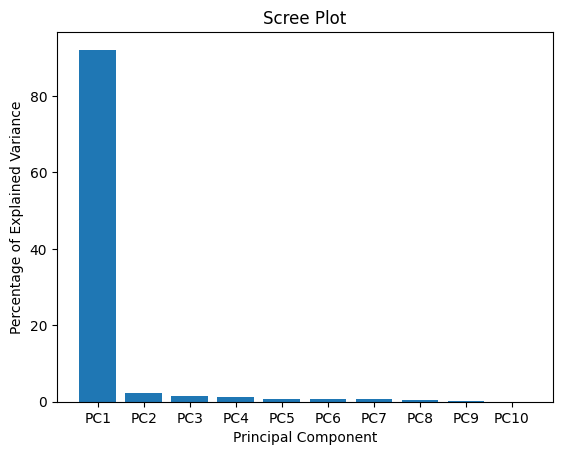

In [5]:
#melakukan plotting untuk melihat bobot dari setiap variansi PCA
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] #labelin diagram

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

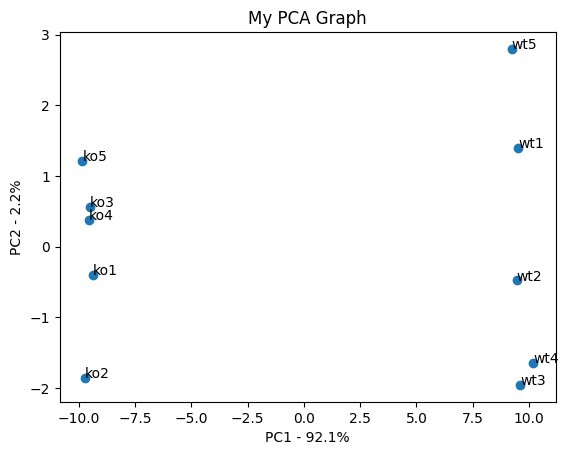

In [6]:
#melakukan plotting PCA (dikasih nama)
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [7]:
#mencari tahun komponen yang paling berpengaruh
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# mengambil data 10 biji
top_10_genes = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_genes])
#hasil menunjukkan angka yang mirip-mirip. Artinya seluruh gene memiliki pengaruh yang sama besarnya

gene60    0.104135
gene57    0.104134
gene67   -0.104133
gene65   -0.104121
gene54   -0.104104
gene29    0.104083
gene2    -0.104082
gene4    -0.104079
gene6     0.104053
gene9    -0.104053
dtype: float64
